In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 2s 0us/step


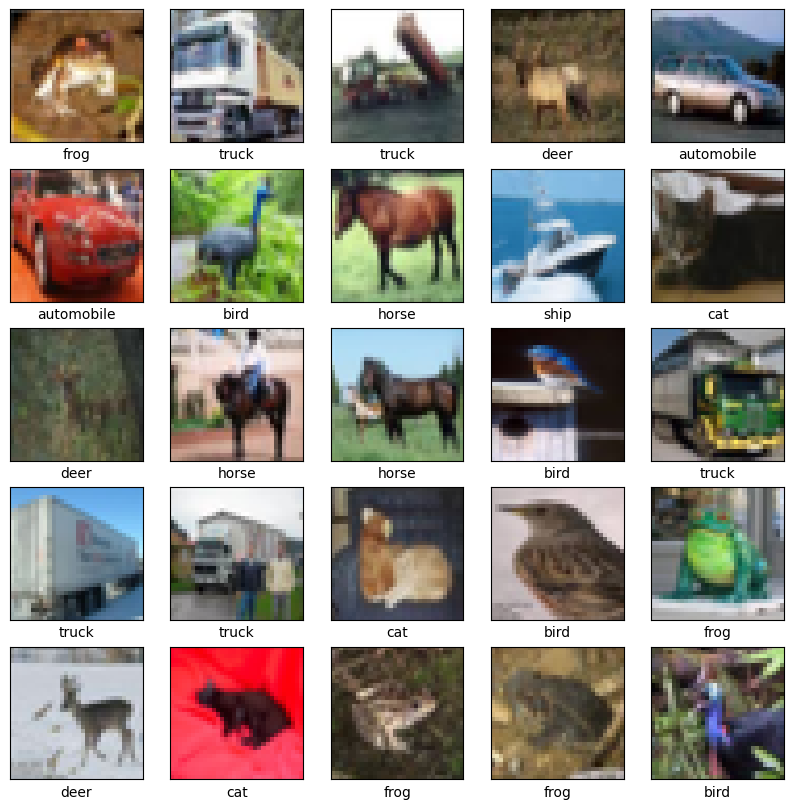

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 81s 51ms/step - loss: 1.5155 - accuracy: 0.4462 - val_loss: 1.2318 - val_accuracy: 0.5662
Epoch 2/10
1563/1563 [==============================] - 68s 43ms/step - loss: 1.1598 - accuracy: 0.5855 - val_loss: 1.0815 - val_accuracy: 0.6202
Epoch 3/10
1563/1563 [==============================] - 69s 44ms/step - loss: 1.0116 - accuracy: 0.6453 - val_loss: 1.0120 - val_accuracy: 0.6480
Epoch 4/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.9122 - accuracy: 0.6821 - val_loss: 0.9688 - val_accuracy: 0.6593
Epoch 5/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.8452 - accuracy: 0.7043 - val_loss: 0.8690 - val_accuracy: 0.7025
Epoch 6/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.7808 - accuracy: 0.7263 - val_loss: 0.8956 - val_accuracy: 0.6943
Epoch 7/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.7350 - accuracy: 0.7430 - val_loss: 0.8691 -

313/313 - 5s - loss: 0.8900 - accuracy: 0.6998 - 5s/epoch - 16ms/step


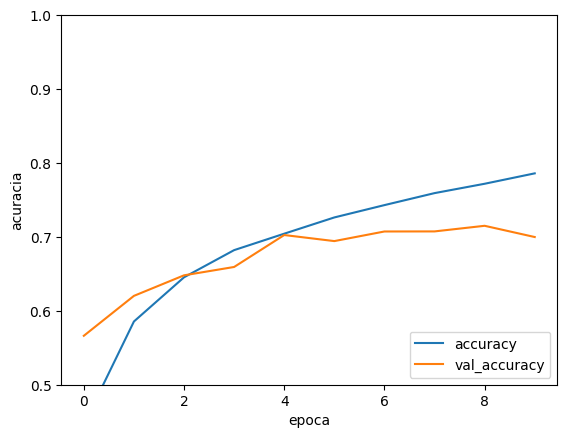

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('epoca')
plt.ylabel('acuracia')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
print(test_acc)


0.6998000144958496


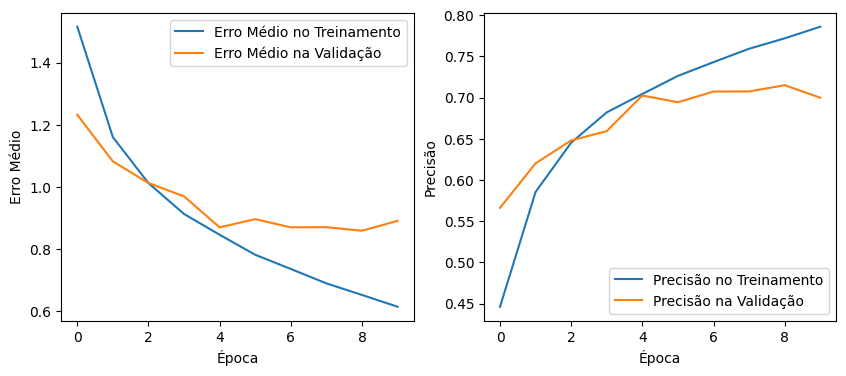

313/313 [==============================] - 8s 25ms/step


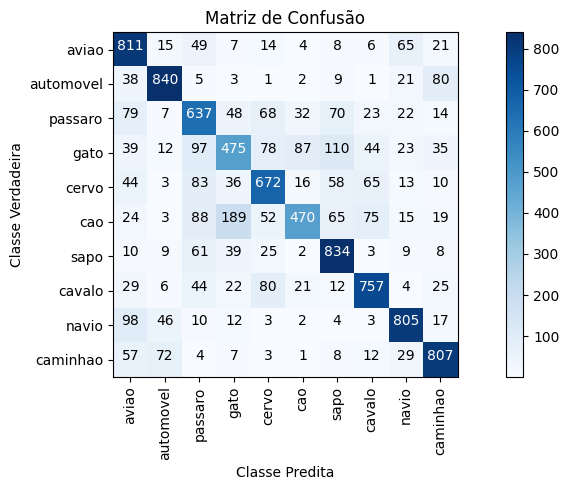

In [ ]:

import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Plotar a curva do erro médio durante o treinamento
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Erro Médio no Treinamento')
plt.plot(history.history['val_loss'], label='Erro Médio na Validação')
plt.xlabel('Época')
plt.ylabel('Erro Médio')
plt.legend()

# Plotar a curva da precisão durante o treinamento
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisão no Treinamento')
plt.plot(history.history['val_accuracy'], label='Precisão na Validação')
plt.xlabel('Época')
plt.ylabel('Precisão')
plt.legend()
plt.show()


# Tradução dos nomes das classes
class_names = ['aviao', 'automovel', 'passaro', 'gato', 'cervo',
               'cao', 'sapo', 'cavalo', 'navio', 'caminhao']

# Calcular a matriz de confusão
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(test_labels, y_pred_classes)

# Exibir a matriz de confusão menor com nomes das classes traduzidos e números
plt.figure(figsize=(10, 5))  # Definir o tamanho da figura
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusão')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=90)  # Rotacionar os nomes das classes
plt.yticks(tick_marks, class_names)

# Exibir os números na matriz de confusão
thresh = cm.max() / 2.
for i in range(len(class_names)):
    for j in range(len(class_names)):
        plt.text(j, i, f'{cm[i, j]}', horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

plt.ylabel('Classe Verdadeira')
plt.xlabel('Classe Predita')
plt.tight_layout()
plt.show()
